# Module 0: Core ML
## Advanced ML @ SBU (Fall '23)

# Table of Contents:

- [Load Data](#load-and-view-data)
    - [Basic Descriptive Functions](#basic-descriptive-functions)
    - [Indexing Data](#indexing-data)
        - [Fetch Column by Name](#fetching-by-column-name)
        - [`loc` and `iloc`](#loc-and-iloc)
            - [`loc` vs `iloc`](#loc-vs-iloc)
            - [Why use `loc` at all?](#why-use-loc-at-all)
    - [Conditional Selection](#conditional-selection)
    - [Type Casting](#typecasting)
- [Data Visualization](#data-visualization)
- [Attempting to Build ML Model](#attempting-to-use-data-as-is-in-the-machine-learning-model)
- [Basic Data Cleaning](#data-cleaning)
    - [Exploring NaN Data](#explore-nan-data)
    - [Basic Feature Processing](#basic-feature-processing)
- [Model Building: Try 2](#model-training-try-2)

## Load and View data

<div id="basefunc"/>

### Basic Descriptive Functions

Here, we'll show a brief introduction to Pandas, and the various functions we can use to learn more about our data.

In [1]:
import pandas as pd

filename = './data/spaceship-titanic.csv'

df = pd.read_csv(filename)

df.tail(10)    # Default 5

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8683,9272_02,Earth,False,F/1894/P,TRAPPIST-1e,21.0,False,86.0,3.0,149.0,208.0,329.0,Gordo Simson,False
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,True
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False
8687,9275_03,Europa,NaN,A/97/P,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [2]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [3]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
df.shape

(8693, 14)

In [5]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [6]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

## Indexing Data

### Fetching by Column Name

It's pretty easy to fetch a specific column by it's name:

In [7]:
# Get column by name
df.CryoSleep

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689     True
8690    False
8691    False
8692    False
Name: CryoSleep, Length: 8693, dtype: object

In [8]:
# Alternatively, when our column name can't be access in the above method 
# (e.g., it starts with a space, or a number, or something else that might cause Python to throw a syntax error)
df['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

### `loc` and `iloc`

Pandas has it's own accessor operators, namely `loc` and `iloc`. 
- `iloc`: Index-based selection.
- `loc`: Label-based selection. In this paradigm, it's the data index value, not it's position which matters

In [9]:
# Access specific item in a column by index
df.iloc[3]

PassengerId          0003_02
HomePlanet            Europa
CryoSleep              False
Cabin                  A/0/S
Destination      TRAPPIST-1e
Age                     33.0
VIP                    False
RoomService              0.0
FoodCourt             1283.0
ShoppingMall           371.0
Spa                   3329.0
VRDeck                 193.0
Name            Solam Susent
Transported            False
Name: 3, dtype: object

In [10]:
# Getting first column for the first three rows
df.iloc[:3, 0]

0    0001_01
1    0002_01
2    0003_01
Name: PassengerId, dtype: object

In [11]:
# It's also possible to pass a list for this;

df.iloc[[3, 4, 7], 0:4]

,PassengerId,HomePlanet,CryoSleep,Cabin
3,0003_02,Europa,False,A/0/S
4,0004_01,Earth,False,F/1/S
7,0006_02,Earth,True,G/0/S


In [12]:
# loc example
df.loc[6, "HomePlanet"]

'Earth'

In [13]:
df["Age"]

0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8688    41.0
8689    18.0
8690    26.0
8691    32.0
8692    44.0
Name: Age, Length: 8693, dtype: float64

#### `loc` vs `iloc`

These methods use slightly different indexing schemes.

> `iloc` uses the Python stdlib indexing scheme, where the first element of the range is included and the last one excluded. So `0:10` will select entries `0,...,9`. `loc`, meanwhile, indexes inclusively. So `0:10` will select entries `0,...,10`.

#### Why use `loc` at all?

Many times, we can do what we need to do with `df[...]` without having to use `df.loc[...]`. However, there are times where we might prefer to use `df[...].loc` over `df[...]`:

- `df.loc[row_indexer, column_index]` can select rows and columns. `df[indexer]` can only select rows or columns depending on the type of values in indexer and the type of column values df has 
- When a slice is passed to `df.loc` the end-points are included in the range. When a slice is passed to `df[...]`, the slice is interpreted as a half-open interval. (See point above)
- Using `loc` is better when we're assigning values to specific rows and columns, otherwise, we might get a `SettingWithCopy` warning. Whenever you get this warning, it's best to check and see if our operation has really worked as intended.

## Conditional Selection

In [15]:
# Returns series of Booleans based on each row in df. These "lists" of booleans can then be used to further filter
# the dataframe

df.Age == 24

0       False
1        True
2       False
3       False
4       False
        ...  
8688    False
8689    False
8690    False
8691    False
8692    False
Name: Age, Length: 8693, dtype: bool

We can use `loc` alongside conditional selection:

In [16]:
df.loc[df.Age == 25]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,new_column
51,0053_01,Earth,False,F/11/S,TRAPPIST-1e,25.0,False,0.0,0.0,1938.0,0.0,1.0,Elson Hickerson,True,0
162,0186_01,Earth,False,G/28/P,TRAPPIST-1e,25.0,False,62.0,0.0,0.0,0.0,956.0,Camiet Shephendry,False,0
173,0196_01,Mars,False,D/5/P,PSO J318.5-22,25.0,False,1052.0,0.0,719.0,0.0,7.0,Caper Emead,False,0
199,0220_04,Earth,False,E/10/P,TRAPPIST-1e,25.0,False,122.0,84.0,NaN,0.0,0.0,Dont Wilsoney,False,0
299,0331_01,Earth,False,F/72/P,TRAPPIST-1e,25.0,False,0.0,0.0,251.0,0.0,552.0,Lewise Burchard,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8526,9103_01,Earth,False,G/1479/P,TRAPPIST-1e,25.0,False,3402.0,2449.0,28.0,259.0,197.0,Sadine Mcdanield,False,0
8527,9104_01,Europa,True,C/302/P,55 Cancri e,25.0,False,0.0,0.0,0.0,0.0,0.0,Izares Foraud,True,0
8559,9139_01,Mars,False,F/1766/S,TRAPPIST-1e,25.0,False,410.0,32.0,14.0,1239.0,10.0,Poselk Paste,False,0
8639,9220_01,Earth,False,G/1496/P,TRAPPIST-1e,25.0,False,2.0,45.0,45.0,0.0,815.0,Branca Meyerthy,False,0


In [17]:
# We can also combine conditions

df.loc[(df.Age == 24) & (df.HomePlanet == "Earth")]

# And -> &, or -> |

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,new_column
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0
17,0015_01,Earth,False,F/4/P,55 Cancri e,24.0,False,0.0,1.0,0.0,0.0,637.0,Carry Hughriend,False,0
78,0084_01,Earth,False,G/14/S,TRAPPIST-1e,24.0,False,688.0,0.0,0.0,0.0,17.0,Coren Coopezmaney,True,0
95,0103_01,Earth,False,F/24/S,TRAPPIST-1e,24.0,False,0.0,NaN,0.0,0.0,17.0,Arlen Mclainez,True,0
130,0140_01,Earth,True,G/19/P,TRAPPIST-1e,24.0,False,0.0,0.0,0.0,0.0,0.0,Evaley Mejiaddox,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8500,9075_01,Earth,False,E/580/P,TRAPPIST-1e,24.0,False,0.0,10.0,758.0,0.0,20.0,Stal Nolds,False,0
8596,9176_01,Earth,False,F/1773/S,TRAPPIST-1e,24.0,False,0.0,537.0,0.0,5.0,197.0,Willy Mcneiderson,True,0
8608,9188_01,Earth,False,G/1481/S,TRAPPIST-1e,24.0,False,0.0,0.0,807.0,0.0,2.0,Delley Pager,False,0
8611,9192_01,Earth,False,F/1880/P,PSO J318.5-22,24.0,False,NaN,599.0,NaN,0.0,0.0,Norahe Drakeekss,True,0


Pandas comes with a few built-in selectors that makes things a bit easier though.

For example: `isin`
- Lets you select data whose value *is in* a list of values.

In [18]:
df.loc[df.HomePlanet.isin(["Europa", "Mars"])]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,new_column
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False,0
8687,9275_03,Europa,NaN,A/97/P,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True,0
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,0


### Typecasting:

In [ ]:
df['Transported']

In [ ]:
df['Transported'].astype(int)

In [ ]:
df['Transported'].astype(bool)

In [ ]:
df['Destination'].astype(str)

## Data Visualization

> When to use Seaborn or Matplotlib?

1. Basic statistical plots are better using Matplotlib, but more complex statistical plots are better with Seaborn.
2. Compared to seaborn, Matplotlib has a less steep learning curve.
3. Compared to Matplotlib, Seaborn offers more appealing default color palettes. However, if you like, matplotlib allows you to build your own color palettes.

In [19]:
# Import relevant libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)

Text(0.5, 1.0, 'Target distribution')

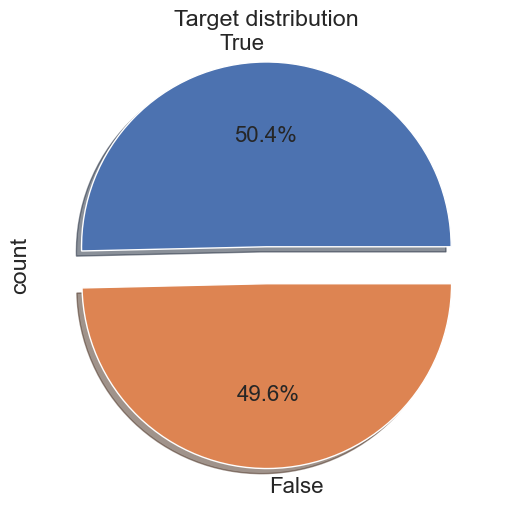

In [20]:
# Figure size
plt.figure(figsize=(6,6))

# Pie plot
df['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', 
    shadow=True, textprops={'fontsize':16}).set_title("Target distribution")

Text(0.5, 0, 'Age (years)')

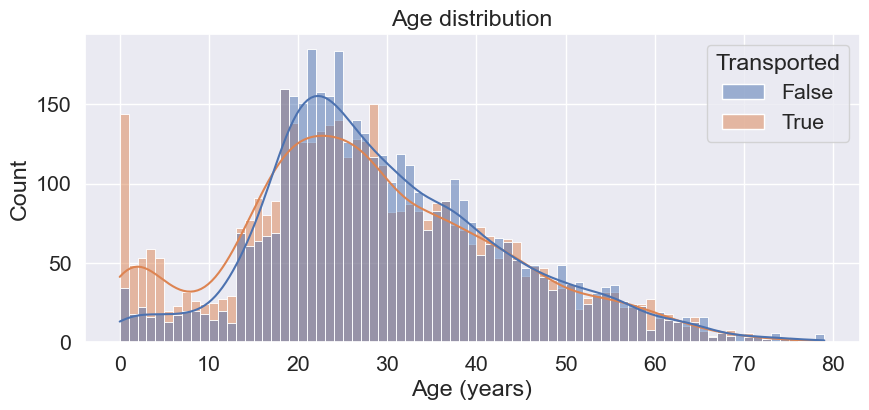

In [22]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=df, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

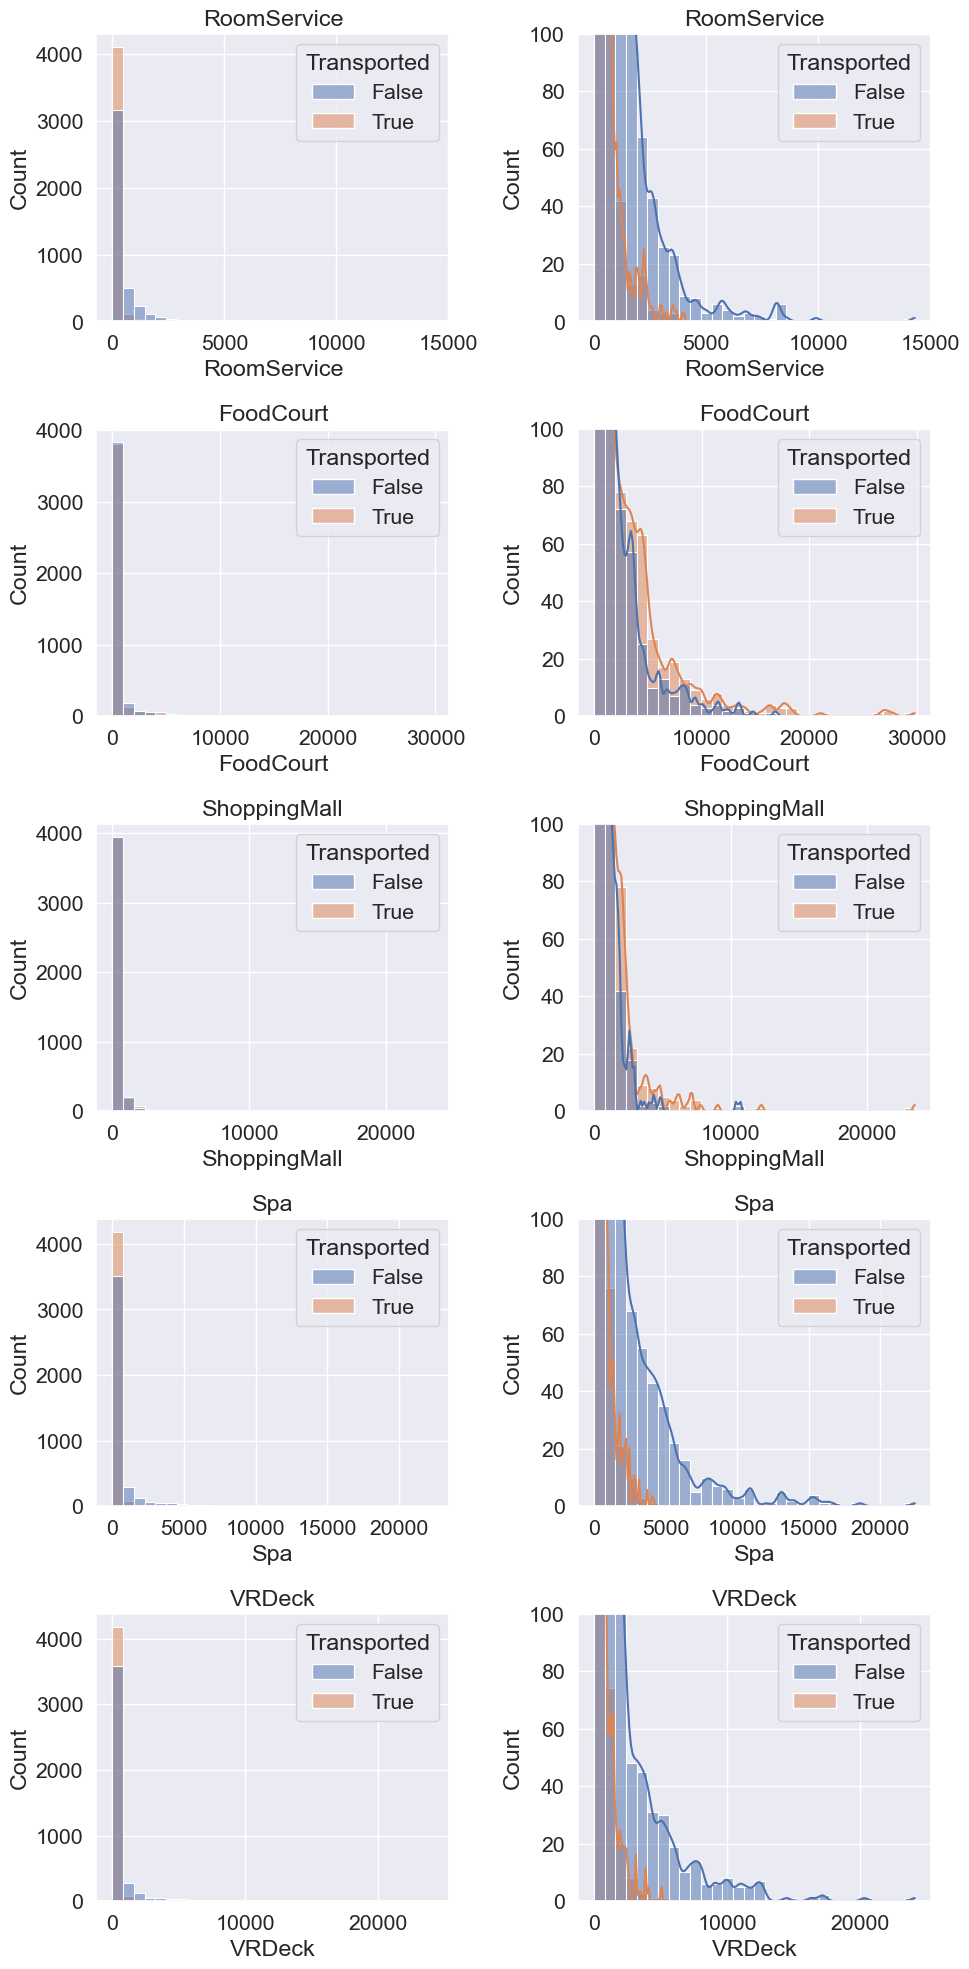

In [23]:
# Expenditure features
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

### Categorical Features

In [ ]:
# Unable to do right now: why?

# Check documentation

## Attempting to Use Data as-is in the Machine Learning Model

Model used: [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(df.drop('Transported', axis=1), df['Transported'])

ValueError: could not convert string to float: 'Europa'

Let's take another look at our data:

In [25]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,new_column
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0


## Data Cleaning

### Explore `NaN` data:

In [26]:
import numpy as np

# Columns with missing values
na_cols=df.columns[df.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(df[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(df),2)
mv

,Number_missing,Percentage_missing
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


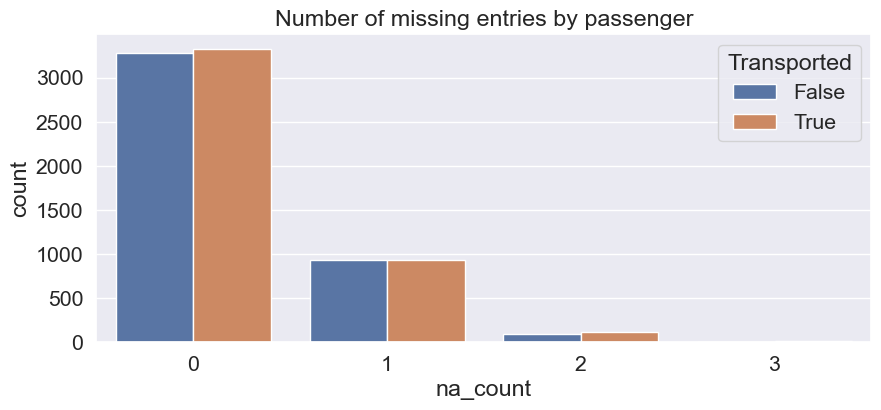

In [27]:
# Countplot of number of missing values by passenger

df['na_count']=df.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='na_count', hue='Transported')
plt.title('Number of missing entries by passenger')
df.drop('na_count', axis=1, inplace=True)

In [28]:
df = df.dropna()    # For the purposes of this week; we'll be expanding on this next week

In [29]:
df.shape

(6606, 15)

### Basic Feature Processing

In [30]:
# Convert boolean columns 
bool_col = ['CryoSleep', 'VIP']

for col in bool_col:
    df[col] = df[col].astype(int)

df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,new_column
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0


In [31]:
df.nunique()

PassengerId     6606
HomePlanet         3
CryoSleep          2
Cabin           5305
Destination        3
Age               80
VIP                2
RoomService     1093
FoodCourt       1293
ShoppingMall     984
Spa             1143
VRDeck          1106
Name            6590
Transported        2
new_column         1
dtype: int64

In [32]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,new_column
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0


In [33]:
# Determine irrelevant columns
columns_to_drop = ['Cabin', 'Name', 'PassengerId']
df.drop(columns=columns_to_drop, axis=1, inplace=True)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,new_column
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,0


In [34]:
pd.get_dummies(df["Destination"], dtype=int)

,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
8688,1,0,0
8689,0,1,0
8690,0,0,1
8691,1,0,0


In [35]:
# Fix categorical columns
cat_columns = ['HomePlanet', 'Destination']
for col in cat_columns:
    df = pd.concat([df, pd.get_dummies(df[col], dtype=int)], axis=1)

df.drop(cat_columns, axis=1, inplace=True)

In [36]:
df.drop('new_column', axis=1, inplace=True)

In [37]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,1,0,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,0,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,0,0,0,0,1


# Model Training: Try 2

In [38]:
X, y = df.drop('Transported', axis=1), df['Transported']
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [39]:
# Evaluate model
preds = model.predict(X)

from sklearn.metrics import accuracy_score
accuracy_score(y, preds)

0.9335452618831366

> But we're missing something; what?

In [40]:
# Test/train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

In [41]:
# Explore new: shape, type, etc.

X_train.shape

(5945, 14)

In [42]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

preds = model.predict(X_test)
accuracy_score(y_test, preds)

0.773071104387292

- Has the score improved? Why doesn't it *not* matter as much?
- Is `accuracy_score` the best choice? When is it a good option? When is it not?

[Back to Top](#module-0-core-ml)